In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
url = "https://raw.githubusercontent.com/ayyoubmaul/k-means-cluster/main/data/Mall_Customers.csv"

df = pd.read_csv(url)
df.head()

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Genre       200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isna().sum()

CustomerID    0
Genre         0
Age           0
Income        0
Spending      0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Income,Spending
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Age'>

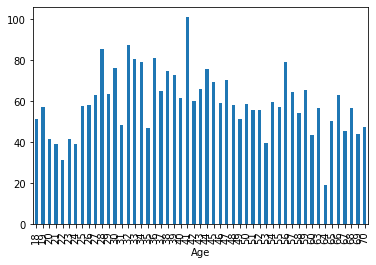

In [6]:
# rata" income setiap umur

df_income = df.groupby(['Age'])['Income'].mean()
df_income.plot(kind='bar')

<AxesSubplot:xlabel='Age'>

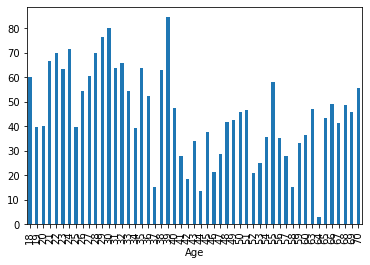

In [7]:
# rata" spending setiap umur

df_spending = df.groupby(['Age'])['Spending'].mean()
df_spending.plot(kind='bar')

<AxesSubplot:xlabel='Income', ylabel='Spending'>

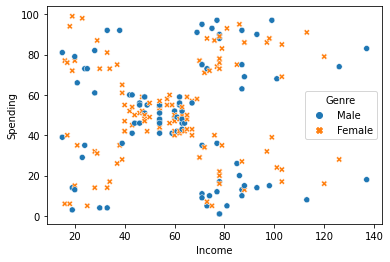

In [8]:
sns.scatterplot(data=df, x='Income', y='Spending', hue='Genre', style='Genre')

In [9]:
# K- means
## elbow
def elbow(df, max_cluster):
    wcss=[]
    range_clusters = range(1, max_cluster+1)
    for n_cluster in range_clusters:

        # fitting model
        kmeans = KMeans(n_cluster).fit(df)

        # wcss
        wcss_iter = kmeans.inertia_

        wcss.append(wcss_iter)
    
    plt.plot(range_clusters, wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    plt.show()

In [10]:
def silhouette(df, max_cluster):
    silhouette_avg = []
    range_clusters = range(2, max_cluster+1)    
    for n_cluster in range_clusters:
        kmeans = KMeans(n_clusters=n_cluster).fit(df)
        cluster_labels = kmeans.labels_
        silhouette_avg.append(silhouette_score(df, cluster_labels))

    plt.plot(range_clusters, silhouette_avg)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette analysis for optimal k')
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

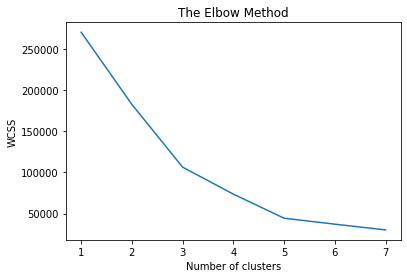

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

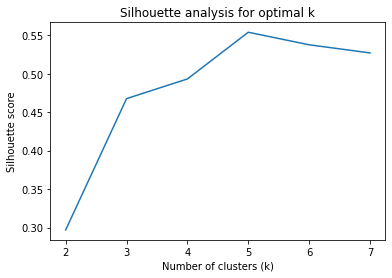

In [11]:
# find best K value

# data
df_cluster = df[['Income','Spending']]
elbow(df_cluster,7)
silhouette(df_cluster,7)

K optimal = 5

In [12]:
n_cluster = 5
df_cluster = df[['Income','Spending']]
kmeans = KMeans(n_cluster)
kmeans.fit(df_cluster)
identified_clusters = kmeans.fit_predict(df_cluster)
df_with_clusters = df.copy()
df_with_clusters['Clusters'] = identified_clusters
df_with_clusters.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Genre,Age,Income,Spending,Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


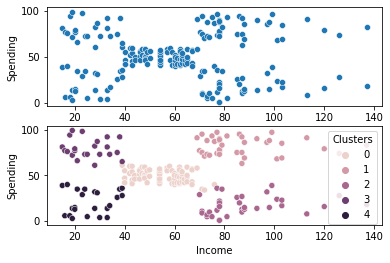

In [13]:
fig, ax =plt.subplots(2,1)
sns.scatterplot(data=df, x='Income', y='Spending', ax=ax[0])
sns.scatterplot(data=df_with_clusters, x='Income', y='Spending', hue='Clusters', ax=ax[1])
fig.show()